<a href="https://colab.research.google.com/github/newmantic/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db = y_[idx]
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

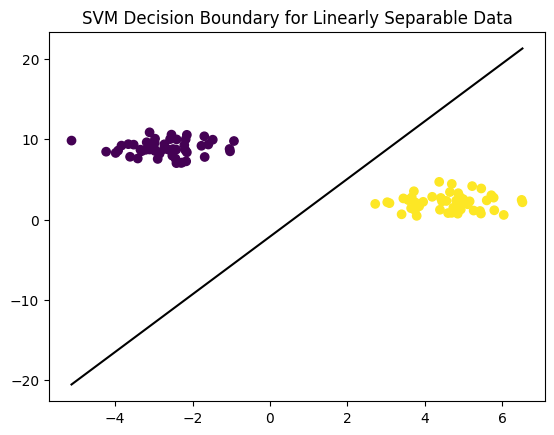

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def test_case_1():
    X, y = make_blobs(n_samples=100, centers=2, random_state=42)
    y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X, y)

    # Plot decision boundary
    def plot_hyperplane(w, b):
        x0_1 = np.min(X[:, 0])
        x0_2 = np.max(X[:, 0])
        x1_1 = (-w[0] * x0_1 - b) / w[1]
        x1_2 = (-w[0] * x0_2 - b) / w[1]
        plt.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
    plot_hyperplane(svm.w, svm.b)
    plt.title("SVM Decision Boundary for Linearly Separable Data")
    plt.show()

test_case_1()

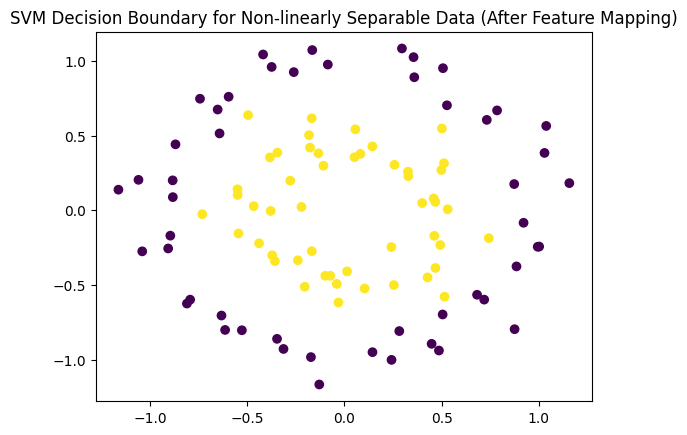

In [4]:
from sklearn.datasets import make_circles

def test_case_2():
    X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
    y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

    # Feature mapping: add squared terms
    X_mapped = np.hstack((X, X**2))

    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X_mapped, y)

    # Plot decision boundary (in the original space)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
    plt.title("SVM Decision Boundary for Non-linearly Separable Data (After Feature Mapping)")
    plt.show()

test_case_2()